In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# File to Load 
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

#merge
city_ride_data = pd.merge(city_data,ride_data, how = "left", on = ["city","city"])

# Display the data table for preview
city_ride_data

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850
5,Richardfort,38,Urban,2018-04-21 03:44:04,9.54,3698147103219
6,Richardfort,38,Urban,2018-02-03 00:14:26,29.04,4982665519010
7,Richardfort,38,Urban,2018-02-08 15:50:12,16.55,2270463070874
8,Richardfort,38,Urban,2018-04-03 15:07:34,40.77,9496210735824
9,Richardfort,38,Urban,2018-02-19 14:09:20,27.11,8690324801449


# Bubble Plot of Ride Sharing Data

In [3]:
#color scheme dictionary and preview
color_scheme = {'Gold':'#FFD700', 'Light Sky Blue':'#87CEFA', 'Light Coral':'#F08080'}
# sns.palplot(sns.color_palette(color_scheme.values()))
# plt.show()

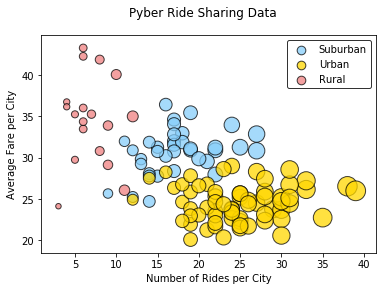

In [4]:
Suburban = city_ride_data[city_ride_data["type"] == "Suburban"]
Urban = city_ride_data[city_ride_data["type"] == "Urban"]
Rural = city_ride_data[city_ride_data["type"] == "Rural"]

suburban_average_fare = Suburban.groupby(["city"]).mean()["fare"]
total_drivers_sub = Suburban.groupby(["city"]).count()["driver_count"]
total_rides_sub = Suburban.groupby(["city"]).count()["ride_id"]

rural_average_fare = Rural.groupby(["city"]).mean()["fare"]
total_drivers_rural = Rural.groupby(["city"]).count()["driver_count"]
total_rides_rural = Rural.groupby(["city"]).count()["ride_id"]

urban_average_fare = Urban.groupby(["city"]).mean()["fare"]
total_drivers_urban = Urban.groupby(["city"]).count()["driver_count"]
total_rides_urban = Urban.groupby(["city"]).count()["ride_id"]

#Color Dictionary 
city_color = {'Urban': color_scheme['Gold'], 'Suburban': color_scheme['Light Sky Blue'], 'Rural': color_scheme['Light Coral']}

plt.suptitle('Pyber Ride Sharing Data')

# Obtain the x and y coordinates for each of the three city types(the size of bubbles determine number of drivers in the city)
plt.scatter(total_rides_sub, suburban_average_fare, s = total_drivers_sub*10, color = city_color['Suburban'], edgecolor = 'black', label = 'Suburban', alpha = .75)  
plt.scatter(total_rides_urban, urban_average_fare, s = total_drivers_urban*10, color = city_color['Urban'], edgecolor = 'black', label = 'Urban', alpha = .75)  
plt.scatter(total_rides_rural, rural_average_fare, s = total_drivers_rural*10, color = city_color['Rural'], edgecolor = 'black', label = 'Rural', alpha = .75) 

#print scatter plot
plt.xlabel('Number of Rides per City')
plt.ylabel('Average Fare per City')

lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

plt.show()

# Total Fares by City Type

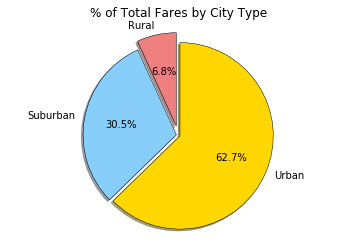

In [5]:
#group by type to be used by all pie charts
city_type = city_ride_data.groupby('type')['type', 'fare', 'ride_id', 'driver_count']

#total fare by city
sum_of_fares = city_type.sum()['fare']

#pie chart build
labels = sum_of_fares.index

#colors and exploe the same for all pie charts, reference here
colors = [city_color[n] for n in labels]
explode = [0.1 , 0.02, .02]
plt.pie(sum_of_fares, startangle = 90, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})

#pie chart display
plt.title('% of Total Fares by City Type')
plt.axis('equal')
plt.show()

# Total Rides by City Type

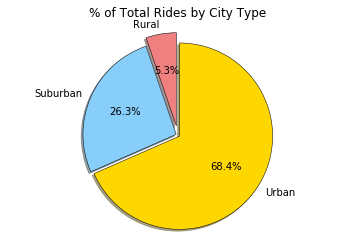

In [6]:
# number of ride per city type
total_rides = city_type.count()['ride_id']

labels = total_rides.index

plt.pie(total_rides, startangle = 90, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
explode = [0.1 , 0.02, .02]
plt.title('% of Total Rides by City Type')
plt.axis('equal')
plt.show()

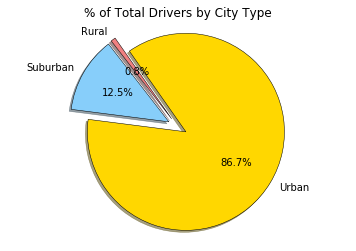

In [7]:
# of driver per city type
driver_count = city_type.sum()['driver_count']

labels = driver_count.index
explode = [0.1, 0.1, .1]
plt.pie(driver_count, startangle = 125, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})

plt.title('% of Total Drivers by City Type')
plt.axis('equal')
plt.show()

In [8]:
#I guess one of the first observations is that quite naturally there are more drivers in the Urban areas, 
#followed by Suburban and then rural. The fares in rural areas are significantly higher than in urban and suburban cities. The volumes of rides 
#subsequently is a lot more in urban than in suburban and the lowest being in rural areas.